# **Punto 1**
> Utilizando la herramienta Jupyter Notebook y el lenguaje de programación Python, realiza la siguiente actividad:
1. Calcula la primera derivada de las siguientes funciones
*   Considera la función: f(x,y) = 3x2 + 2xy + 15x + 6y2 - y, comenzando desde el punto inicial (x, y) = (-2, 3), encuentra el mínimo valor estimado para el cual esta función converge.

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sympy import *
x,y = symbols('x,y')

In [2]:
funcion = 3*x**2+2*x*y+15*x+6*y**2-y
punto_inicio = np.vstack([-2,3])
f = lambdify((x,y),funcion)
funcion

3*x**2 + 2*x*y + 15*x + 6*y**2 - y

In [3]:
def gradientDescent(gradiente, punto_inicio, tamaño_paso = .085, precision = .01, max_iter = 3000, initError = 10):
    x,y = punto_inicio.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])
    while npl.norm(error) > precision and currIter<max_iter:
        currIter+=1
        prevX = currX.copy()
        currX -= tamaño_paso * np.array(gradiente(x,y))
        x,y = currX[0].copy(), currX[1].copy()
        error = currX - prevX
        iterCoords.append(np.hstack([x,y]))
    return currIter, currX, np.vstack(iterCoords)

El minimo valor es de 4  //  [-2.68208632]  //  [0.53118189]  


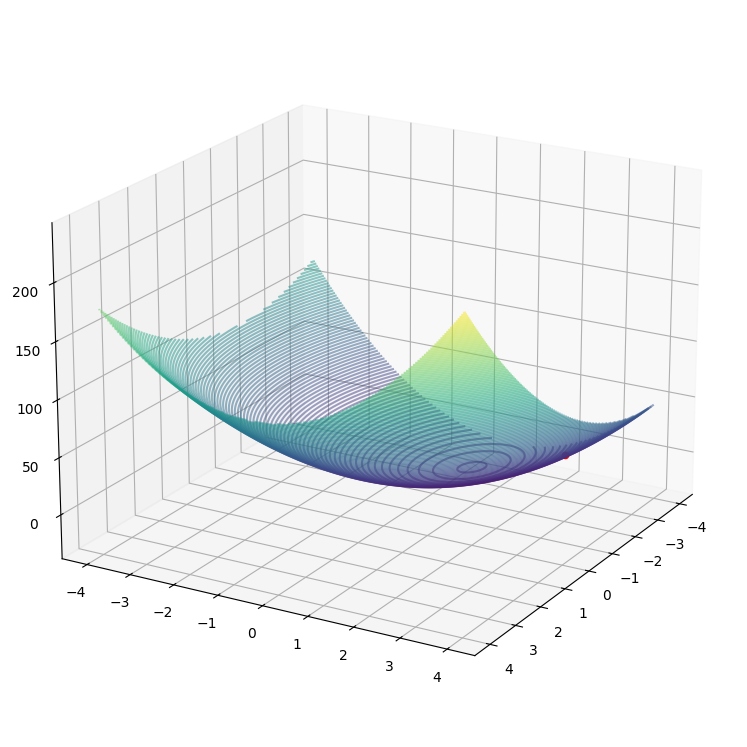

In [4]:
l = 4   #eje x
n = 150 #eje y
linspace = np.linspace(-l,l,n)
X,Y = np.meshgrid(linspace,linspace)
Z = f(X,Y)
fig = plt.figure(figsize = (15,16), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)
ax.view_init(20, 30)
ax.scatter3D(punto_inicio[0],punto_inicio[1],f(*punto_inicio), color='red')
ax.view_init(20, 30)

gradiente = lambdify((x,y),(funcion.diff(x),funcion.diff(y)))

pasos_totales, coordenada_final, coordenadas_intermedias = gradientDescent(gradiente,punto_inicio)
print(f'El minimo valor es de {pasos_totales}  //  {coordenada_final[0]}  //  {coordenada_final[1]}  ')